In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diwali=pd.read_csv('/content/Diwali Sales Data.csv',encoding='unicode_escape')
diwali

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
# no of rows and cols
diwali.shape

(11251, 15)

# Preprocessing steps:

In [4]:
diwali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Check for null values

In [5]:
diwali.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

Lets fill the Amount column with it's mean and drop Status & unnamed1 columns

In [6]:
diwali['Amount'].fillna(diwali['Amount'].mean(),inplace=True)
diwali['Amount'].isna().sum()

0

In [7]:
# dropping Status and unnamed1 columns
diwali.drop(['Status','unnamed1'],axis=1,inplace=True) # axis=1 means columns

In [8]:
diwali.head(1)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0


Lets drop duplicate rows if any are present

In [9]:
diwali.duplicated().sum() # gives no of duplicate rows

8

In [10]:
# Lets drop duplicate rows
diwali.drop_duplicates(inplace=True) # duplicate rows are dropped

In [11]:
diwali.duplicated().sum() # Now no duplicate rows are present

0

Change data type of some columns

In [12]:
diwali['Amount']=diwali['Amount'].apply(int)

In [13]:
diwali['Amount'].info() # We can observe below the dtype changed to int64 from float

<class 'pandas.core.series.Series'>
Int64Index: 11243 entries, 0 to 11250
Series name: Amount
Non-Null Count  Dtype
--------------  -----
11243 non-null  int64
dtypes: int64(1)
memory usage: 175.7 KB


# Exploratory Data Analysis:

In [14]:
diwali.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

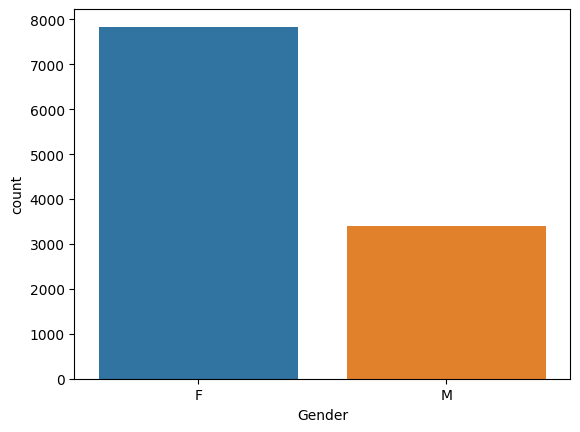

In [15]:
sns.countplot(data=diwali,x='Gender')

In [16]:
diwali['Gender'].value_counts()

F    7838
M    3405
Name: Gender, dtype: int64

In [17]:
amount=diwali.groupby('Gender')['Amount'].sum().reset_index()
amount

,Gender,Amount
0,F,74402209
1,M,31890052


<Axes: xlabel='Gender', ylabel='Amount'>

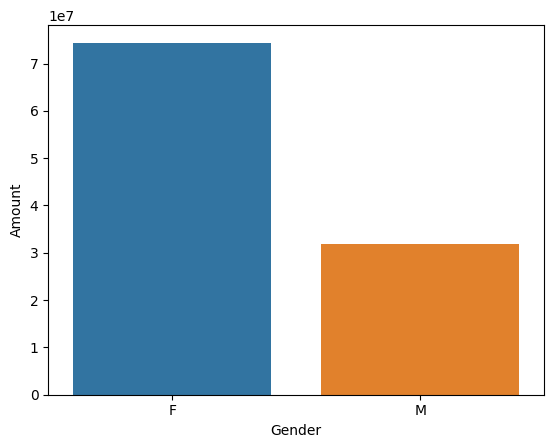

In [18]:
sns.barplot(data=amount,x='Gender',y='Amount')

#### Conclusion: From the above graphs we can observe that most of the buyers are females and even the purchasing power of females is grater than males.

# Q. Most of the buyers belongs to which age group?

<Axes: xlabel='Age Group', ylabel='count'>

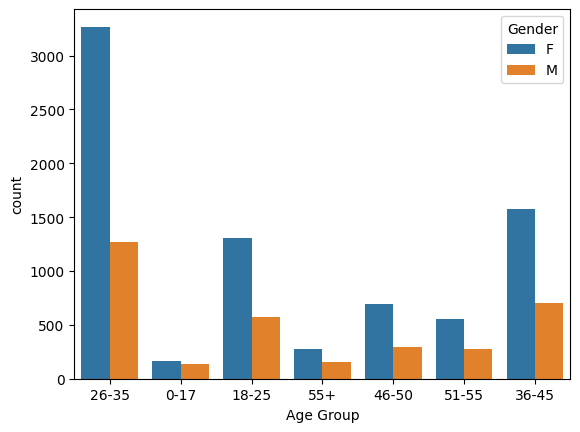

In [19]:
sns.countplot(data=diwali,x='Age Group',hue='Gender')

In [20]:
diwali['Age Group'].value_counts()

26-35    4538
36-45    2285
18-25    1878
46-50     987
51-55     831
55+       428
0-17      296
Name: Age Group, dtype: int64

In [21]:
diwali.groupby(['Age Group','Gender'])['User_ID'].count()

Age Group  Gender
0-17       F          162
           M          134
18-25      F         1305
           M          573
26-35      F         3268
           M         1270
36-45      F         1580
           M          705
46-50      F          696
           M          291
51-55      F          554
           M          277
55+        F          273
           M          155
Name: User_ID, dtype: int64

#### Conclusion: Most of the buyers belongs to 26-35 age group.

# Q. Which age group spent more total amount on Diwali?

In [22]:
age_amount=diwali.groupby('Age Group')['Amount'].sum().reset_index()
age_amount

,Age Group,Amount
0,0-17,2699653
1,18-25,17235530
2,26-35,42600673
3,36-45,22163494
4,46-50,9245656
5,51-55,8256815
6,55+,4090440


<Axes: xlabel='Age Group', ylabel='Amount'>

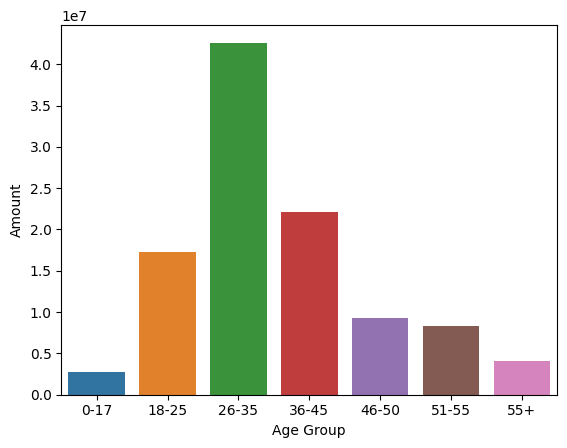

In [23]:
sns.barplot(data=age_amount,x='Age Group',y='Amount')

#### Conclusion: 26-35 age group spent more total amount as more people also belongs to this group.

# Q. On an average which group spent more amount on Diwali?

<Axes: xlabel='Age Group', ylabel='Amount'>

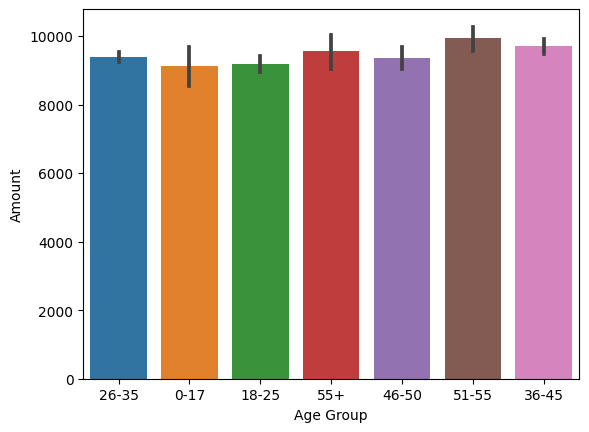

In [24]:
sns.barplot(data=diwali,x='Age Group',y='Amount')

#### Conclusion: On an average all age groups spent equal amount on Diwali

# Q. Maximum people who bought products on Diwali belongs to which state?

In [25]:
num_state=diwali['State'].value_counts().sort_values(ascending=False)
num_state

Uttar Pradesh       1944
Maharashtra         1523
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              451
Bihar                433
Gujarat              428
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

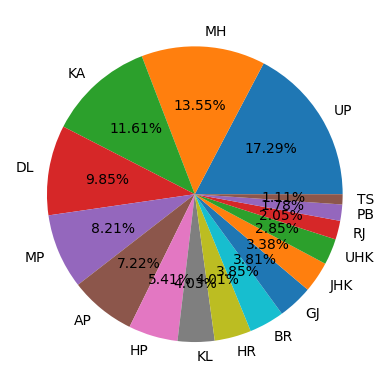

In [26]:
plt.pie(num_state,labels=['UP','MH','KA','DL','MP','AP','HP','KL','HR','BR','GJ','JHK','UHK','RJ','PB','TS'],autopct='%1.2f%%')
plt.show()

#### Conclusion: More customers are from 1-Uttar Pradesh, 2-Maharastra, 3-Karnataka, 4-Delhi, 5-Madhya Pradesh and 6-Andhra Pradesh.

# Q. Which state contributes highest total budget amount?

In [27]:
state_budget=diwali.groupby('State')['Amount'].sum().sort_values(ascending=False)
state_budget

State
Uttar Pradesh       19364961
Maharashtra         14413920
Karnataka           13532993
Delhi               11632177
Madhya Pradesh       8120048
Andhra Pradesh       8046599
Himachal Pradesh     4963368
Haryana              4217871
Bihar                4014669
Gujarat              3957065
Kerala               3894491
Jharkhand            3026456
Uttarakhand          2520944
Rajasthan            1909409
Punjab               1525800
Telangana            1151490
Name: Amount, dtype: int64

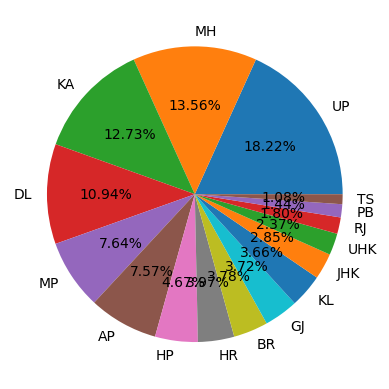

In [28]:
plt.pie(state_budget,labels=['UP','MH','KA','DL','MP','AP','HP','HR','BR','GJ','KL','JHK','UHK','RJ','PB','TS'],autopct='%1.2f%%')
plt.show()

<Axes: xlabel='Amount', ylabel='State'>

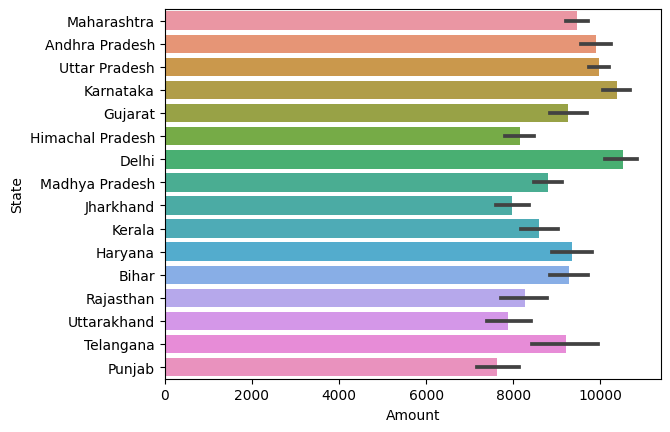

In [29]:
# bar plot between Amount vs State
sns.barplot(data=diwali,y='State',x='Amount') # -> mean amount/average amount spent by each person is shown below in bar plot

# Q. What is the role of married and unmarried (M/F) in the above data?

<Axes: xlabel='Marital_Status', ylabel='count'>

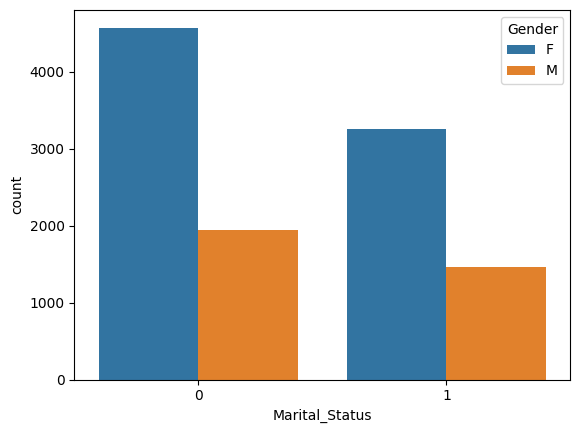

In [30]:
sns.countplot(x='Marital_Status',data=diwali,hue='Gender')

#### Conclusion: More number of people are unmarried.

# Q. More number of customers are from which sector?

In [31]:
sector=diwali['Occupation'].value_counts().sort_values(ascending=False)
sector

IT Sector          1586
Healthcare         1408
Aviation           1309
Banking            1139
Govt                854
Hospitality         702
Media               637
Automobile          566
Chemical            542
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             350
Agriculture         282
Name: Occupation, dtype: int64

#### Conclusion: IT, HealthCare, Aviation, Banking => from these sectors the more people belongs to

# Q. What is the purchasing power on basis of each sector? Which sectors contibutes more budget?

In [32]:
diwali.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)

Occupation
IT Sector          14789127
Healthcare         13034586
Aviation           12599994
Banking            10789516
Govt                8517212
Hospitality         6356539
Media               6295832
Automobile          5378049
Chemical            5306889
Lawyer              4981665
Retail              4783170
Food Processing     4070670
Construction        3589588
Textile             3214425
Agriculture         2584999
Name: Amount, dtype: int64

#### Conclusion: Purchasing power of these sectors(IT, HealthCare, Aviation, Banking) is more

# Q. Which Product_Category are more likely to sale and what are their total budget?

<Axes: xlabel='count', ylabel='Product_Category'>

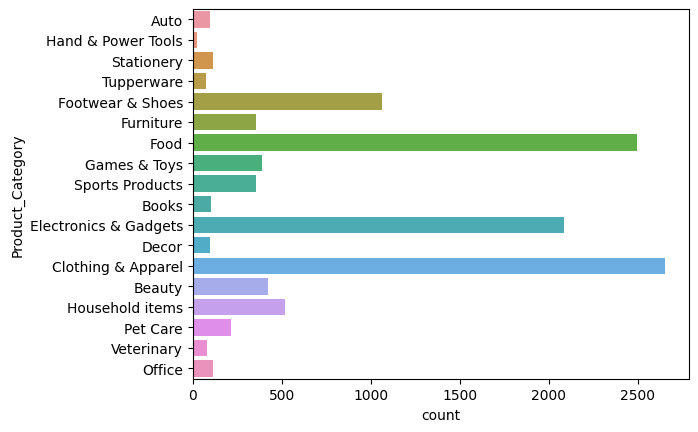

In [33]:
sns.countplot(y='Product_Category',data=diwali)

In [34]:
diwali.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)

Product_Category
Food                     33962242
Clothing & Apparel       16484472
Footwear & Shoes         15622474
Electronics & Gadgets    15607657
Furniture                 5449504
Games & Toys              4331694
Sports Products           3635933
Auto                      1963400
Beauty                    1959484
Stationery                1676051
Household items           1569337
Tupperware                1155642
Books                     1061478
Decor                      730360
Pet Care                   482277
Hand & Power Tools         405618
Veterinary                 112702
Office                      81936
Name: Amount, dtype: int64

# Final Conclusion:
### Unmarried/Married women age group of 26-35 from UP, Maharastra, Karnataka working in IT, HealthCare, Aviation and Banking are more likely to buy products from Food, Clothing, Footwear & Electronics category.